<a href="https://colab.research.google.com/github/dvnielxy/astro/blob/master/RegressionQuasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
import pandas as pd
import numpy as np

filename = ('/content/gdrive/My Drive/Colab Notebooks/dr9q_fit.fits')
hdu_fits = fits.open(filename)
hdu = fits.open(filename)[1]
header = hdu.header
wcs = WCS(header)
print (wcs)

data=hdu.data
print (data)

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 686  87822
[('000000.47-002703.9', 1.97831659e-03, -0.45108829, 4216, 310, 55477, 0.24995296, 0.25 , -1.        , -1.00000000e+00, -1.        , -1.        , -1.00000000e+00, -1.        , -1.        ,    0.        , -1.,   0.        , -1., -3.00000000e+05, -1.,   0.        , -1.,    0.        , -1.,  0.        , -1., -300000.        , -1.,   0.        , -1.,     0.        , -1.,  0.        , -1., -3.00000000e+05, -1.,   0.        , -1., 0.00000000e+00, -1.,   0.        , -1.,    0.        , -1.,   0.        , -1., -3.00000000e+05, -1.,   0.        , -1., 2298.67000834, -1., 64.27742969, -1.,  1.64958607e+02, -1., -14.65182438, -1., 2.23529114, -1., -16.11066829, -1., 254.741708, -1., 26.34479015, -1., -15.04412284, -1., -5.4489311e+01, -1., -13.12042921, -1., -12.90400265, -1., -12.7601818 , -1., [ 3.32646096, -0.375910

In [3]:
table=Table.read(hdu_fits)
#table.colnames
table

SDSS_NAME,RA,DEC,PLATE,FIBER,MJD,Z_PIPE,Z_VI,Z_PCA,FWHM_CIV_FPG,REW_CIV_FPG,REW_CIV_ERR_FPG,FWHM_MGII_FPG,REW_MGII_FPG,REW_MGII_ERR_FPG,FWHM_CIV,FWHM_CIV_ERR,REW_CIV,REW_CIV_ERR,VOFF_CIV,VOFF_CIV_ERR,LOGF_CIV,LOGF_CIV_ERR,FWHM_CIII,FWHM_CIII_ERR,REW_CIII,REW_CIII_ERR,VOFF_CIII,VOFF_CIII_ERR,LOGF_CIII,LOGF_CIII_ERR,FWHM_ALIII,FWHM_ALIII_ERR,REW_ALIII,REW_ALIII_ERR,VOFF_ALIII,VOFF_ALIII_ERR,LOGF_ALIII,LOGF_ALIII_ERR,REW_SIIII,REW_SIIII_ERR,LOGF_SIIII,LOGF_SIIII_ERR,FWHM_MGII,FWHM_MGII_ERR,REW_MGII,REW_MGII_ERR,VOFF_MGII,VOFF_MGII_ERR,LOGF_MGII,LOGF_MGII_ERR,FWHM_BROAD_HB,FWHM_BROAD_HB_ERR,REW_BROAD_HB,REW_BROAD_HB_ERR,VOFF_BROAD_HB,VOFF_BROAD_HB_ERR,LOGF_BROAD_HB,LOGF_BROAD_HB_ERR,REW_NARROW_HB,REW_NARROW_HB_ERR,LOGF_NARROW_HB,LOGF_NARROW_HB_ERR,FWHM_OIII_5007,FWHM_OIII_5007_ERR,REW_OIII_5007,REW_OIII_5007_ERR,LOGF_OIII_5007,LOGF_OIII_5007_ERR,VOFF_OIII_5007,VOFF_OIII_5007_ERR,LOGF1350,LOGF1350_ERR,LOGF3000,LOGF3000_ERR,LOGF5100,LOGF5100_ERR,CONTI_FIT [2],CONTI_FIT_ERR [2],CONTI_REDCHI2,CONTI_STATUS,LINE_REDCHI2,LINE_STATUS,LINE_NPIX_HB,LINE_NPIX_MGII,LINE_NPIX_CIII,LINE_NPIX_CIV
str18,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,int32,int32,int32,int32,int32
000000.47-002703.9,0.0019783165939202263,-0.45108829471677764,4216,310,55477,0.24995295703411102,0.25,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,2298.670008340593,-1.0,64.2774296887242,-1.0,164.95860656420774,-1.0,-14.65182438231868,-1.0,2.2352911356404155,-1.0,-16.110668291496495,-1.0,254.74170800292904,-1.0,26.344790150755056,-1.0,-15.04412284248246,-1.0,-54.48931101084666,-1.0,-13.120429210786082,-1.0,-12.904002646679636,-1.0,-12.760181804702583,-1.0,3.3264609558185136 .. -0.3759101100717362,0.07121186279526269 .. 0.03079669808147335,1.1498423548947068,1,1.089666039538195,1,306,69,0,0
000001.93-001427.4,0.008066691350313349,-0.24097078525990853,4216,312,55477,2.1645307540893555,2.163,2.1600770125260818,6538.162600803452,29.02243738994315,0.8729704914045182,5143.809749376881,37.58693277814791,1.4014457383956558,6848.385659787697,-1.0,34.819425782128825,-1.0,1463.2733787650475,-1.0,-14.365271657331485,-1.0,5498.158141824284,-1.0,8.844850998221855,-1.0,442.0082711821357,-1.0,-15.148776656013794,-1.0,14119.02569616,-1.0,2.8667426458471046,-1.0,-270.1125592626993,-1.0,-15.615987159317584,-1.0,24.748892384141914,-1.0,-14.696218911079507,-1.0,4060.2090551234855,-1.0,24.310904980047667,-1.0,-87.63692867982165,-1.0,-15.051001058208485,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,-12.658990276491146,-1.0,-13.021065130436128,-1.0,-13.261672888398198,-1.0,1.0034697711159482 .. -2.0440828124646395,0.015840020377284526 .. 0.025177912718590403,0.9713016643443894,1,0.9422764509582113,1,0,151,332,269
000003.17+011510.6,0.013228998987813156,1.252967112275887,4296,364,55499,2.354281187057495,2.354,2.352232606583584,6492.384357066751,32.81777037773185,0.8728156905140997,6756.701147290911,52.07487500071067,3.9438540244499483,5570.605482314154,-1.0,41.747326283768736,-1.0,255.91092717153472,-1.0,-14.665869568966045,-1.0,9907.701877431762,-1.0,33.02961837894193,-1.0,-502.73772883324756,-1.0,-14.992532227472173,-1.0,14119.02569616,-1.0,14.366843448009691,-1.0,998.308891800016

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
QuasarTable = table['Z_VI','LOGF_CIV', 'LOGF_CIII', 'LOGF_ALIII', 'LOGF_SIIII', 
                    'LOGF_MGII','LOGF_BROAD_HB','LOGF_NARROW_HB','LOGF_OIII_5007']
QuasarTable['class']='QUASAR'
QuasarTable

Z_VI,LOGF_CIV,LOGF_CIII,LOGF_ALIII,LOGF_SIIII,LOGF_MGII,LOGF_BROAD_HB,LOGF_NARROW_HB,LOGF_OIII_5007,class
float64,float64,float64,float64,float64,float64,float64,float64,float64,str6
0.25,0.0,0.0,0.0,0.0,0.0,-14.65182438231868,-16.110668291496495,-15.04412284248246,QUASAR
2.163,-14.365271657331485,-15.148776656013794,-15.615987159317584,-14.696218911079507,-15.051001058208485,0.0,0.0,0.0,QUASAR
2.354,-14.665869568966045,-14.992532227472173,-15.319727770673868,0.0,-15.341535565628329,0.0,0.0,0.0,QUASAR
2.795,-14.668890299079425,-15.211973046561669,-15.79280866543717,0.0,0.0,0.0,0.0,0.0,QUASAR
2.879,-14.931736862166844,-15.242458029703393,-15.81921541286709,0.0,0.0,0.0,0.0,0.0,QUASAR
2.662,-14.737058325267366,-15.052214167147367,-15.312190374673959,-15.847419215921606,-14.202602873642363,0.0,0.0,0.0,QUASAR
2.254,-14.254588412916753,-14.97676990106867,-16.171391997120104,0.0,-14.704092143246513,0.0,0.0,0.0,QUASAR
1.432,-14.019072405422975,-14.29541770583723,-15.069484901680504,0.0,-14.639071121772703,0.0,0.0,0.0,QUASAR
2.624,-14.85711908311641,-14.966410116104147,-15.409649599110633,0.0,-15.101606422508821,0.0,0.0,0.0,QUASAR


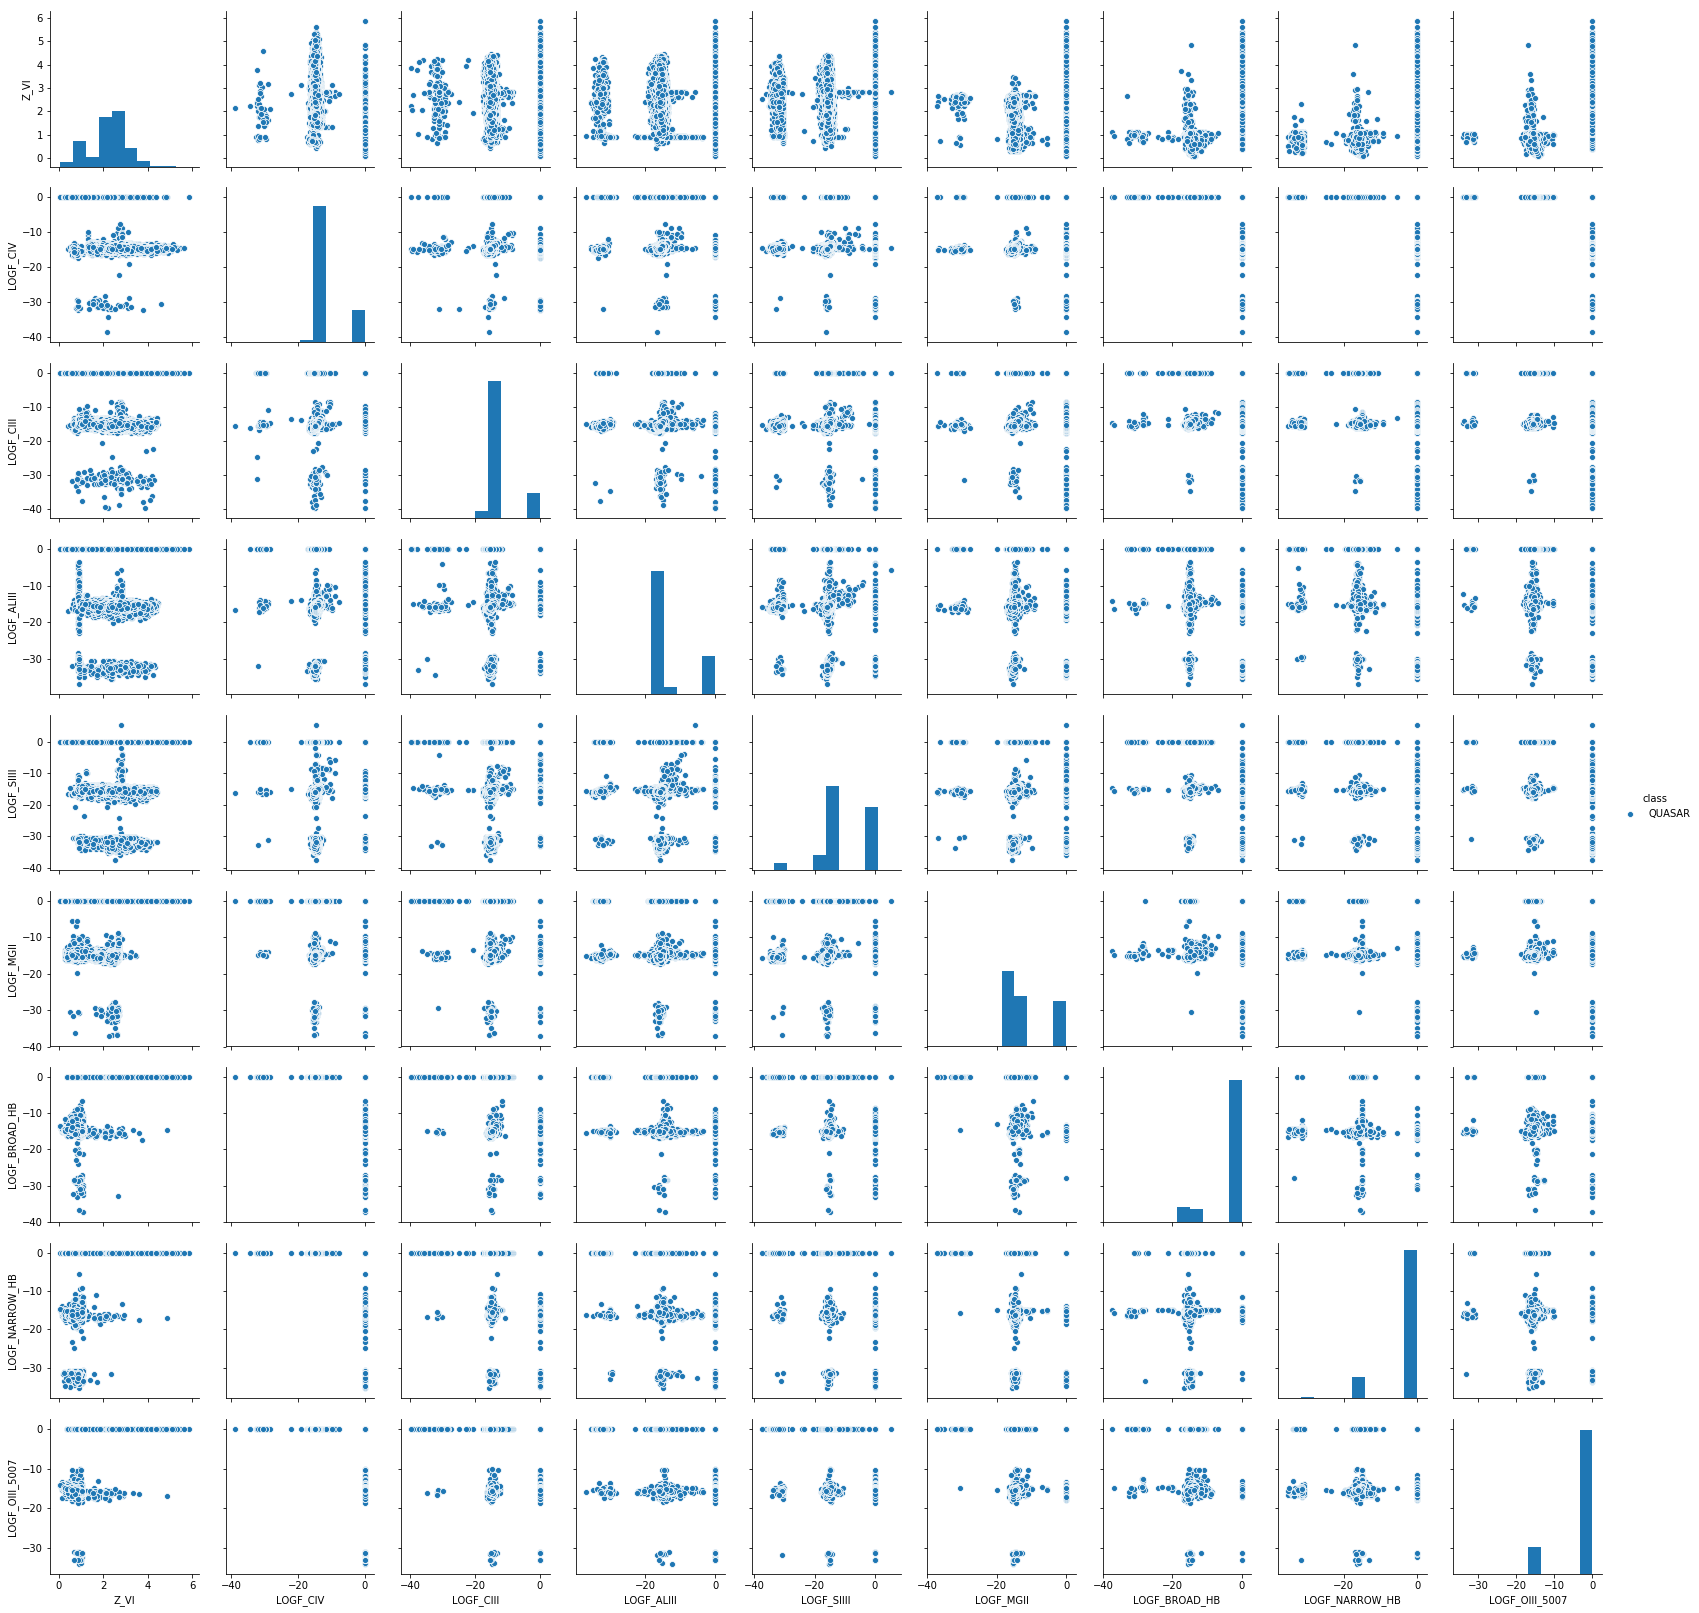

In [5]:
from mpl_toolkits import mplot3d
%matplotlib inline
data_quasar=QuasarTable.to_pandas()
sns.pairplot(data_quasar, hue='class', diag_kind = 'hist')

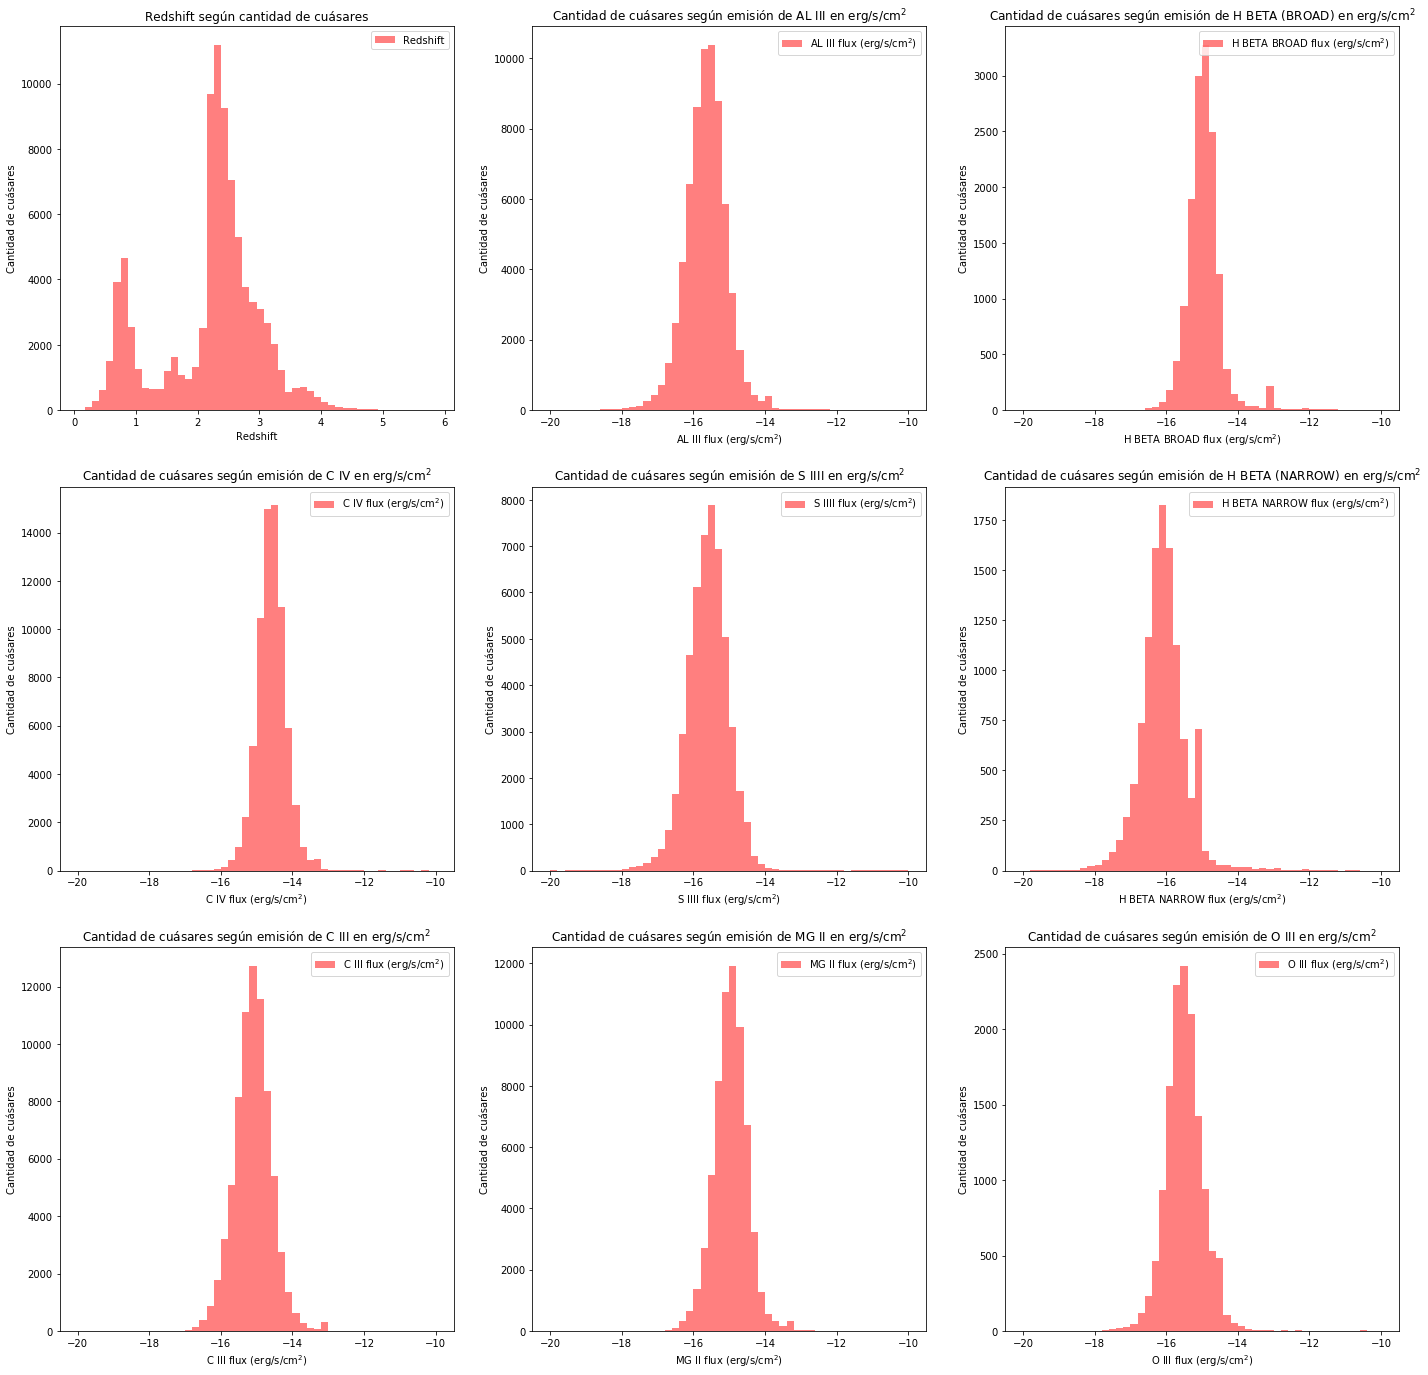

In [6]:
fig, ax = plt.subplots(figsize=(24,24), ncols=3, nrows=3)

redshift = QuasarTable['Z_VI']
civ_flux = QuasarTable['LOGF_CIV']
ciii_flux = QuasarTable['LOGF_CIII']
aliii_flux = QuasarTable['LOGF_ALIII']
siiii_flux = QuasarTable['LOGF_SIIII']
mgii_flux = QuasarTable['LOGF_MGII']
bhbeta_flux = QuasarTable['LOGF_BROAD_HB']
nhbeta_flux = QuasarTable['LOGF_NARROW_HB']
oiii_flux = QuasarTable['LOGF_OIII_5007']

n = 'Cantidad de cuásares'

labels = [redshift, civ_flux, ciii_flux, aliii_flux, siiii_flux, mgii_flux, bhbeta_flux, nhbeta_flux, oiii_flux]
labels_s = ['Redshift', 'C IV flux $( \mathrm{erg/s/cm^2} )$', 'C III flux $( \mathrm{erg/s/cm^2} )$', 'AL III flux $( \mathrm{erg/s/cm^2} )$', 'S IIII flux $( \mathrm{erg/s/cm^2} )$',
            'MG II flux $( \mathrm{erg/s/cm^2} )$', 'H BETA BROAD flux $( \mathrm{erg/s/cm^2} )$', 'H BETA NARROW flux $( \mathrm{erg/s/cm^2} )$', 'O III flux $( \mathrm{erg/s/cm^2} )$']

# REDSHIFT
ax[0,0].hist(labels[0], color='r', label=labels_s[0], alpha=0.5, bins=50)
ax[0,0].set_title('Redshift según cantidad de cuásares')
ax[0,0].set_xlabel(labels_s[0])
ax[0,0].set_ylabel(n)
ax[0,0].legend(loc='best')

# C IV FLUX
ax[1,0].hist(labels[1], color='r', label=labels_s[1], alpha=0.5, bins=50, range=(-20,-10))
ax[1,0].set_title('Cantidad de cuásares según emisión de C IV en $ \mathrm{erg/s/cm^2} $')
ax[1,0].set_xlabel(labels_s[1])
ax[1,0].set_ylabel(n)
ax[1,0].legend(loc='best')

# C III FLUX
ax[2,0].hist(labels[2], color='r', label=labels_s[2], alpha=0.5, bins=50, range=(-20,-10))
ax[2,0].set_title('Cantidad de cuásares según emisión de C III en $ \mathrm{erg/s/cm^2} $')
ax[2,0].set_xlabel(labels_s[2])
ax[2,0].set_ylabel(n)
ax[2,0].legend(loc='best')

# AL III FLUX
ax[0,1].hist(labels[3], color='r', label=labels_s[3], alpha=0.5, bins=50, range=(-20,-10))
ax[0,1].set_title('Cantidad de cuásares según emisión de AL III en $ \mathrm{erg/s/cm^2} $')
ax[0,1].set_xlabel(labels_s[3])
ax[0,1].set_ylabel(n)
ax[0,1].legend(loc='best')

# S IIII FLUX
ax[1,1].hist(labels[4], color='r', label=labels_s[4], alpha=0.5, bins=50, range=(-20,-10))
ax[1,1].set_title('Cantidad de cuásares según emisión de S IIII en $ \mathrm{erg/s/cm^2} $')
ax[1,1].set_xlabel(labels_s[4])
ax[1,1].set_ylabel(n)
ax[1,1].legend(loc='best')

# MG II FLUX
ax[2,1].hist(labels[5], color='r', label=labels_s[5], alpha=0.5, bins=50, range=(-20,-10))
ax[2,1].set_title('Cantidad de cuásares según emisión de MG II en $ \mathrm{erg/s/cm^2} $')
ax[2,1].set_xlabel(labels_s[5])
ax[2,1].set_ylabel(n)
ax[2,1].legend(loc='best')

# BROAD H BETA FLUX
ax[0,2].hist(labels[6], color='r', label=labels_s[6], alpha=0.5, bins=50, range=(-20,-10))
ax[0,2].set_title('Cantidad de cuásares según emisión de H BETA (BROAD) en $ \mathrm{erg/s/cm^2} $')
ax[0,2].set_xlabel(labels_s[6])
ax[0,2].set_ylabel(n)
ax[0,2].legend(loc='best')

# NARROW H BETA FLUX
ax[1,2].hist(labels[7], color='r', label=labels_s[7], alpha=0.5, bins=50, range=(-20,-10))
ax[1,2].set_title('Cantidad de cuásares según emisión de H BETA (NARROW) en $ \mathrm{erg/s/cm^2} $')
ax[1,2].set_xlabel(labels_s[7])
ax[1,2].set_ylabel(n)
ax[1,2].legend(loc='best')

# O III FLUX
ax[2,2].hist(labels[8], color='r', label=labels_s[8], alpha=0.5, bins=50, range=(-20,-10))
ax[2,2].set_title('Cantidad de cuásares según emisión de O III en $ \mathrm{erg/s/cm^2} $')
ax[2,2].set_xlabel(labels_s[8])
ax[2,2].set_ylabel(n)
ax[2,2].legend(loc='best')

In [0]:
#Filtración de Datos:
QuasarTable2=table['LOGF_CIV', 'LOGF_CIII', 'LOGF_ALIII', 'LOGF_SIIII', 'LOGF_MGII']
data_quasar2=QuasarTable2.to_pandas()

In [8]:
#Veamos cuantos datos nos quedan si eliminamos cada flujo menos uno
data_quasar2= data_quasar2[data_quasar2.LOGF_CIV != 0] #34361
data_quasar2= data_quasar2[data_quasar2.LOGF_CIII != 0] #32070
data_quasar2= data_quasar2[data_quasar2.LOGF_ALIII != 0] #34899
data_quasar2= data_quasar2[data_quasar2.LOGF_SIIII != 0] #44605
#data_quasar2= data_quasar2[data_quasar2.LOGF_MGII != 0] #45924 
data_quasar2.shape[0]

45924

In [0]:
#Ordenamos los datos para que queden todos los con flujo MGII=0 al final
data_quasar2=data_quasar2.sort_values(by='LOGF_MGII', ascending=True)

In [10]:
data_quasar2

,LOGF_CIV,LOGF_CIII,LOGF_ALIII,LOGF_SIIII,LOGF_MGII
33721,-15.078838,-15.550205,-15.651744,-16.104010,-36.804818
60629,-15.048157,-15.614090,-16.439831,-30.622790,-36.773681
6253,-14.554326,-15.435210,-15.429587,-15.415503,-36.475596
42733,-15.154495,-15.177514,-16.650044,-15.727522,-34.977215
42020,-15.273817,-16.487849,-16.089917,-16.028761,-33.175889
28364,-15.099719,-15.846028,-17.145642,-16.218942,-32.864753
34909,-14.699833,-15.755490,-16.399580,-15.409308,-32.265627
87385,-15.304727,-15.193199,-16.194256,-33.659391,-31.983466
43840,-14.890507,-14.743190,-16.336558,-16.413408,-31.981095
52675,-14.626585,-15.244170,-15.636292,-15.587336,-31.973122


In [11]:
from sklearn.linear_model import LinearRegression
X = data_quasar2.drop('LOGF_MGII',axis=1)
lm = LinearRegression()
y = data_quasar2.LOGF_MGII
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
pd.DataFrame(zip(X.columns,lm.coef_),columns = ['flujos', 'Coeficientes estimados'])

,flujos,Coeficientes estimados
0,LOGF_CIV,-0.399410
1,LOGF_CIII,-0.089805
2,LOGF_ALIII,0.051122
3,LOGF_SIIII,0.023390


Text(0.5, 1.0, 'Emisión Real vs Predicha MGII [ $ \\mathrm{erg/s/cm^2}] $')

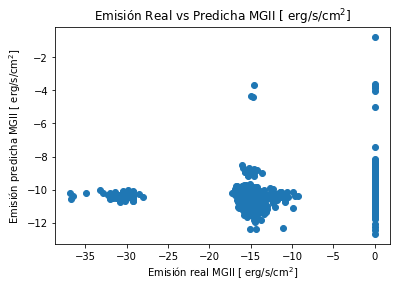

In [13]:
lm.predict(X)
plt.scatter(data_quasar2.LOGF_MGII,lm.predict(X))
plt.xlabel('Emisión real MGII [ $ \mathrm{erg/s/cm^2}] $')
plt.ylabel('Emisión predicha MGII [ $ \mathrm{erg/s/cm^2}] $')
plt.title('Emisión Real vs Predicha MGII [ $ \mathrm{erg/s/cm^2}] $')

In [14]:
error= np.mean((data_quasar2.LOGF_MGII-lm.predict(X))**2)
print(error)

48.563697880067835


In [15]:
lm2 = LinearRegression()
lm2.fit(X[['LOGF_CIV']],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
errorCIV=np.mean((data_quasar2.LOGF_MGII-lm2.predict(X[['LOGF_CIV']]))**2)
print(errorCIV)
#EL ERROR ES MAYOR

48.58278359935053


In [21]:
from sklearn.model_selection import train_test_split
rs=1818
X_train, X_test, Y_train, Y_test = train_test_split(X, data_quasar2.LOGF_MGII, test_size=0.33, random_state=rs)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)


(30769, 4)
(15155, 4)
(30769,)
(15155,)


In [0]:
lm3 = LinearRegression()
lm3.fit(X_train,Y_train)
pred_train = lm3.predict(X_train)
pred_test = lm3.predict(X_test)

In [23]:
#Error 
errorY_train=np.mean((Y_train - lm3.predict(X_train)) ** 2)
errorY_test=np.mean((Y_test - lm3.predict(X_test)) ** 2)
print(errorY_train)
print(errorY_test)

48.43038869630963
48.84293168847931


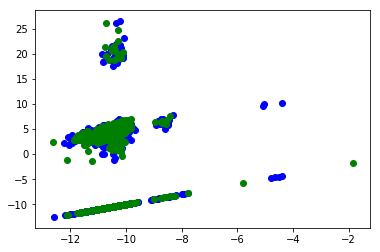

In [24]:
plt.scatter(lm3.predict(X_train), lm3.predict(X_train) - Y_train, c='b' )
plt.scatter(lm3.predict(X_test), lm3.predict(X_test) - Y_test, c='g' )


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn_clf=KNeighborsRegressor(25)
knn_clf.fit(X_train,Y_train)
y_pred=knn_clf.predict(X_test)
print(mean_squared_error(Y_test,y_pred))

49.58309973806606


In [0]:
y_pred